
Life cycle of Machine learning Project
1. Understanding the Problem Statement
2. Data Collection
3. Data Checks to perform
4. Exploratory data analysis
5. Data Pre-Processing
6. Model Training
7. Choose best model


1. Problem statement

    This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


2. Data Collection

    Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
    
    The data consists of 8 column and 1000 rows.

In [72]:
#Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data\stud.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


3. Data Checks to perform

    1. Check Missing values
    2. Check Duplicates
    3. Check data type
    4. Check the number of unique values of each column
    5. Check statistics of data set
    6. Check various categories present in the different categorical column


In [7]:
df.isnull().sum() #check missing values

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no null values in data

In [8]:
df.duplicated().sum()

0

There are no duplicates present in the data

In [9]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Observations

    1. Mean and standard deviation of these columns are almost close.
    2. Minimum value for math_score is 0.

In [12]:
print("Unique categories in gender column: ",df['gender'].unique())
print("Unique categories in gender column: ",df['race_ethnicity'].unique())
print("Unique categories in gender column: ",df['parental_level_of_education'].unique())
print("Unique categories in gender column: ",df['lunch'].unique())
print("Unique categories in gender column: ",df['test_preparation_course'].unique()) 

Unique categories in gender column:  ['female' 'male']
Unique categories in gender column:  ['group B' 'group C' 'group A' 'group D' 'group E']
Unique categories in gender column:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique categories in gender column:  ['standard' 'free/reduced']
Unique categories in gender column:  ['none' 'completed']


In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features =  [feature for feature in df.columns if df[feature].dtype=='O']
print("Numeric features: ",numeric_features)
print("Categorical features: ",categorical_features)

Numeric features:  ['math_score', 'reading_score', 'writing_score']
Categorical features:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding columns for "total_score" and "average_score"

In [14]:
df["total_score"] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3

In [15]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
full_marks_reading = df[df['reading_score']==100]['gender'].count()
full_marks_writing = df[df['writing_score']==100]['gender'].count()
full_marks_maths = df[df['math_score']==100]['gender'].count()

print("No of students having full marks in reading, writing and maths are ",full_marks_reading,full_marks_writing,full_marks_maths)

No of students having full marks in reading, writing and maths are  17 14 7


In [17]:
less_marks_reading = df[df['reading_score']<=20]['gender'].count()
less_marks_writing = df[df['writing_score']<=20]['gender'].count()
less_marks_maths = df[df['math_score']<=20]['gender'].count()

print("No of students having full marks in reading, writing and maths are ",less_marks_reading,less_marks_writing,less_marks_maths)

No of students having full marks in reading, writing and maths are  1 3 4


observations:

1. From above values we get students have performed the worst in Maths
2. Best performance is in reading section

4. Exploratory Data Analysis

    1. Histogram
    2. KDE plot

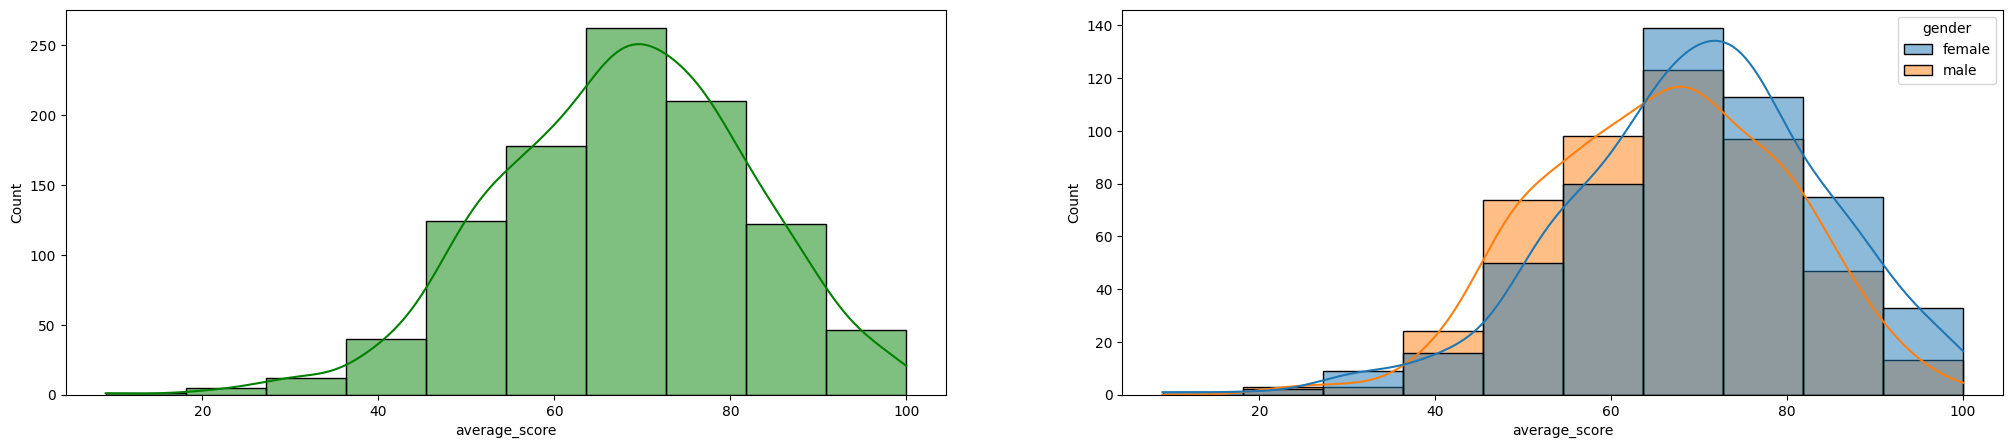

In [28]:
fig, axs = plt.subplots(1,2,figsize = (25,5))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=10,kde=True,color = 'g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',bins=10,kde=True,hue='gender')
plt.show()


observations:

    1. Many students got marks in between 60-80.
    2. Female students tend to have more marks than male students

<Axes: xlabel='average_score', ylabel='Count'>

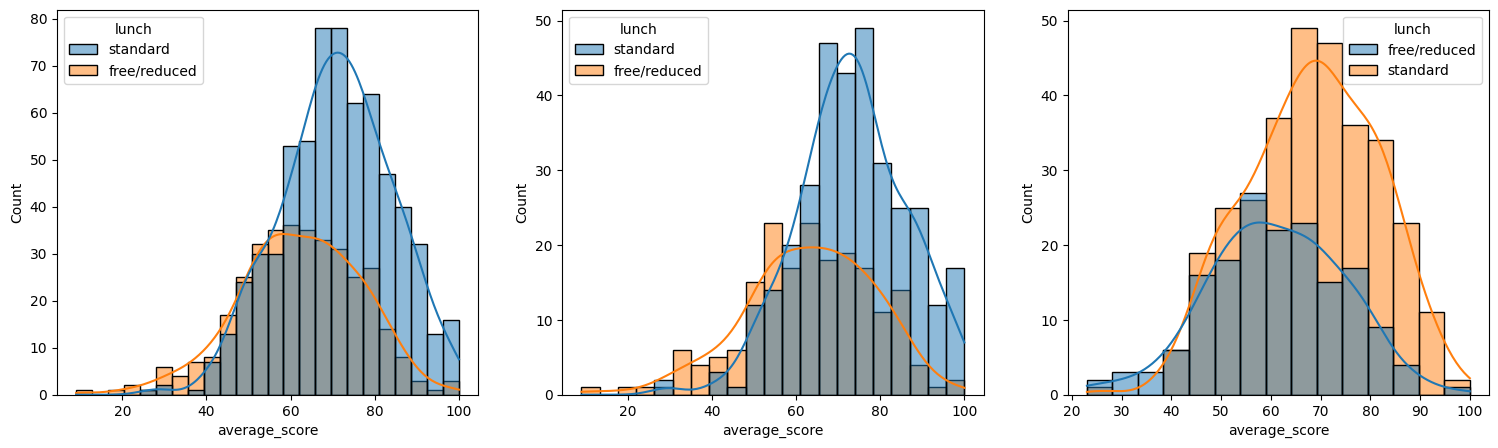

In [33]:
fig, axs = plt.subplots(1,3,figsize = (25,5))
plt.subplot(141)
sns.histplot(data = df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data =df[df['gender']=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data =df[df['gender']=='male'],x='average_score',kde=True,hue='lunch')

Observation:

1. Standards lunch help student to perform well in exam be it male or female.

<Axes: xlabel='average_score', ylabel='Count'>

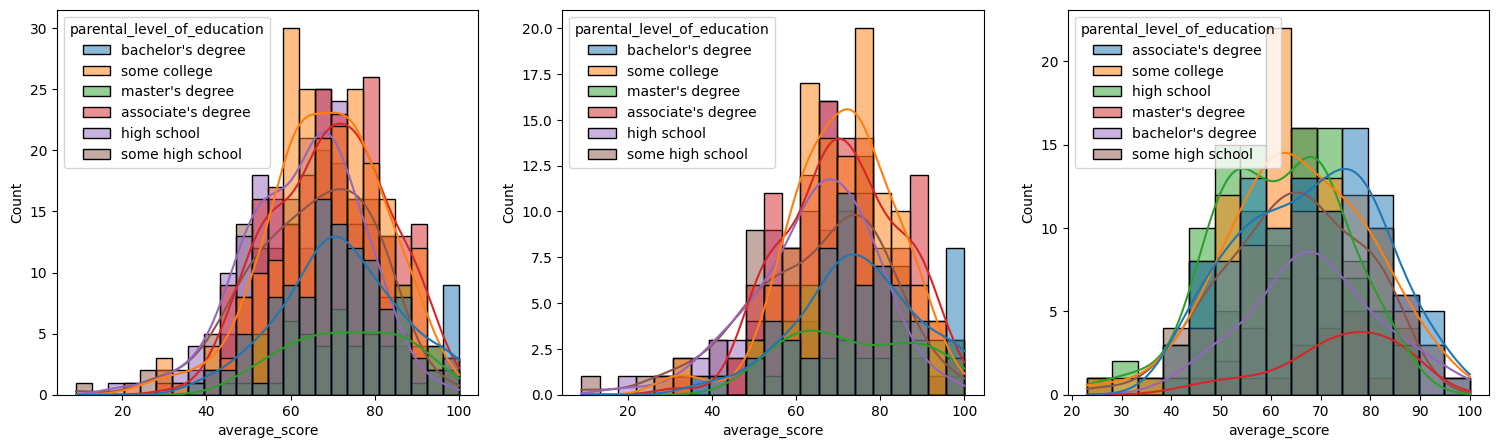

In [35]:
fig, axs = plt.subplots(1,3,figsize = (25,5))
plt.subplot(141)
sns.histplot(data = df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data =df[df['gender']=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data =df[df['gender']=='male'],x='average_score',kde=True,hue='parental_level_of_education')

Observations:

1. We did not see any effect of parental education on students performance
2. In third plot, parents who studied high school, their male child performs well in exam.

<Axes: xlabel='average_score', ylabel='Count'>

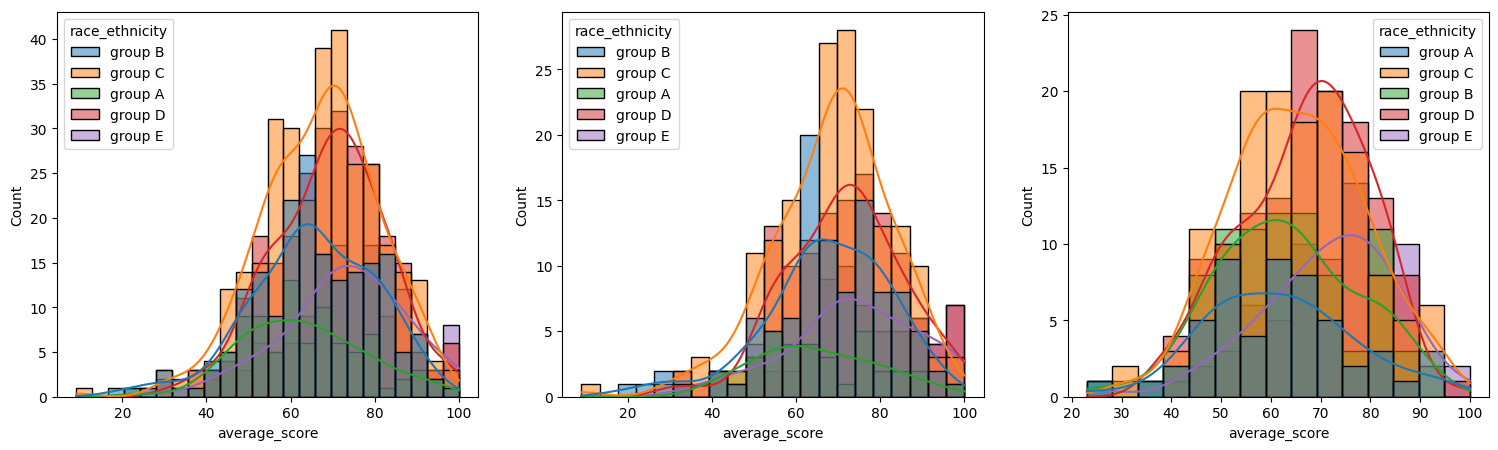

In [37]:
fig, axs = plt.subplots(1,3,figsize = (25,5))
plt.subplot(141)
sns.histplot(data = df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data =df[df['gender']=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data =df[df['gender']=='male'],x='average_score',kde=True,hue='race_ethnicity')

Observation:

1. Students from group A performs poorly in exam

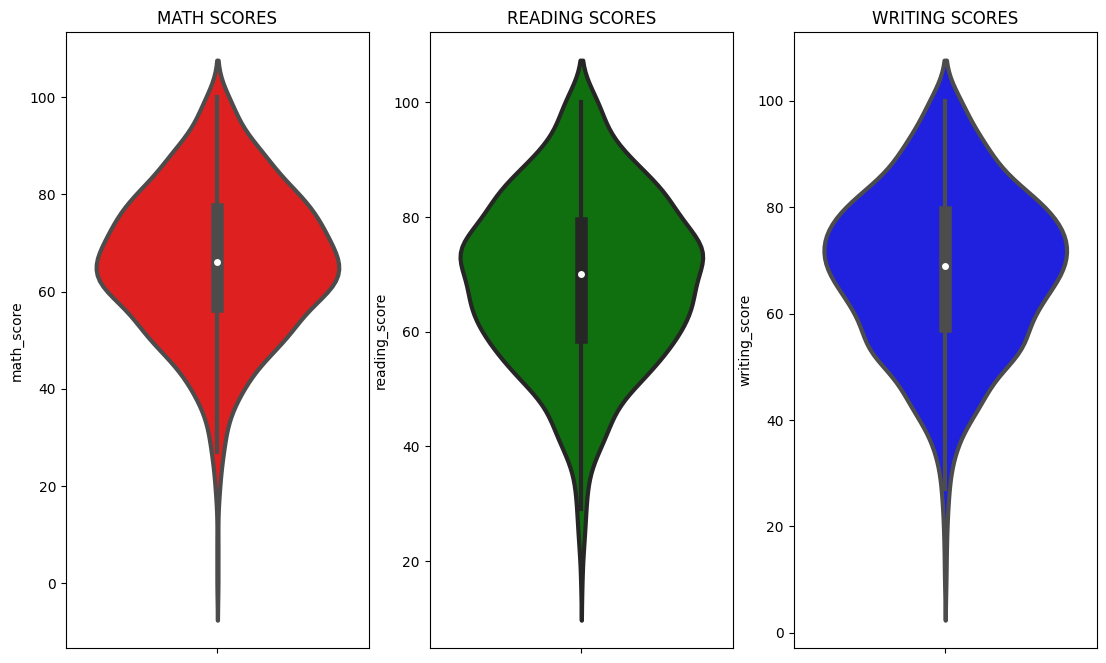

In [40]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Observation:

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80


(-1.25, 1.25, -1.25, 1.25)

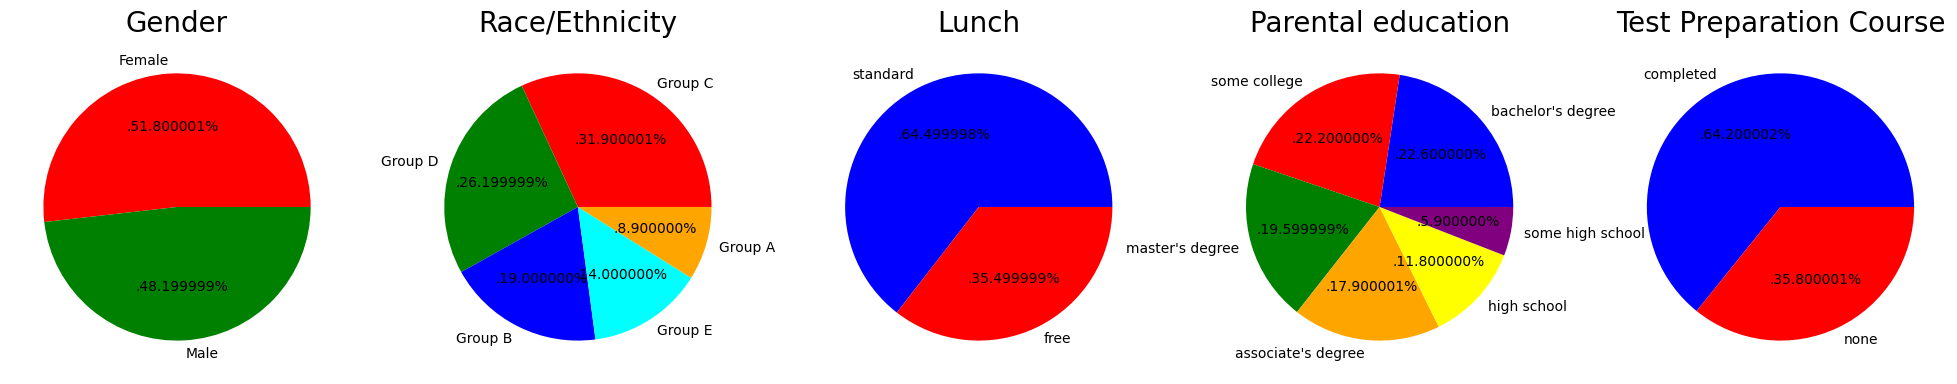

In [51]:
plt.rcParams['figure.figsize'] =(25,5)
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1,5,3)
size = df['lunch'].value_counts()
color = ['blue','red']
labels = 'standard','free'

plt.pie(size,colors = color,labels = labels,autopct='.%2f%%')
plt.title('Lunch',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['parental_level_of_education'].value_counts()
color = ['blue','red','green','orange','yellow','purple']
labels =  "bachelor's degree", 'some college', "master's degree", "associate's degree",'high school', 'some high school'

plt.pie(size,colors = color,labels = labels,autopct='.%2f%%')
plt.title('Parental education',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['test_preparation_course'].value_counts()
color = ['blue','red']
labels =  "completed", 'none'
plt.pie(size,colors = color,labels = labels,autopct='.%2f%%')
plt.title('Test Preparation Course',fontsize = 20)
plt.axis('off')

Observations:

    1. Number of Male and Female students is almost equal
    2. Number students are greatest in Group C
    3. Number of students who have standard lunch are greater
    4. Number of students who have not enrolled in any test preparation course is greater
    5. Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

Feature-wise Visualization

GENDER Column: 

    1.How is distribution of Gender ?
    2.Is gender has any impact on student's performance ?

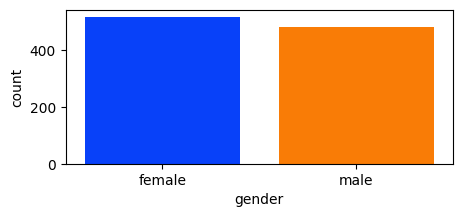

In [87]:
f,ax=plt.subplots(1,1,figsize=(5,2))
sns.countplot(x=df['gender'],data=df,palette ='bright',saturation=0.95)
plt.show()

In [69]:
 gender_group = df[numeric_features + ['total_score','average_score','gender']].groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


[0 1]


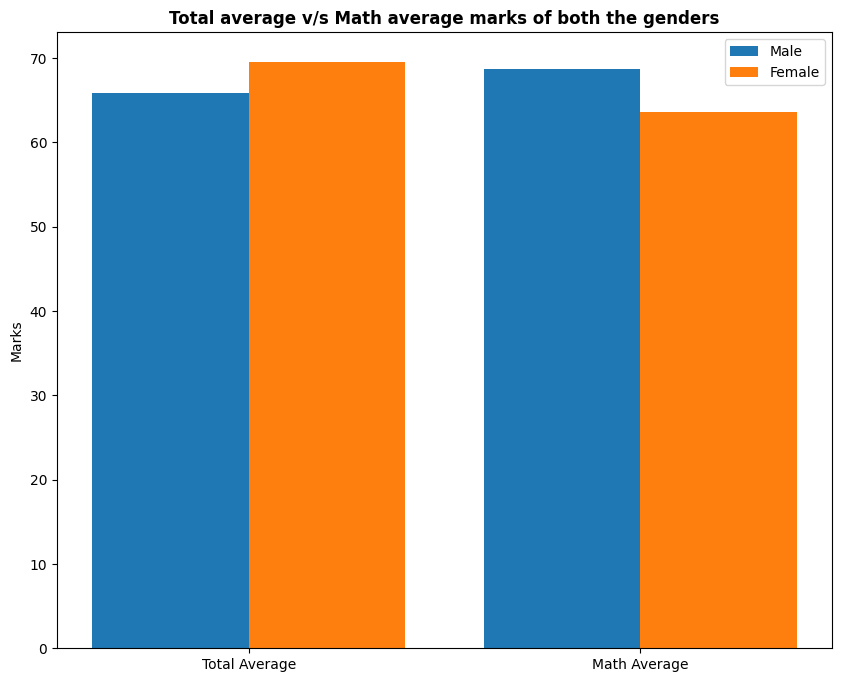

In [80]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
print(X_axis)
  
plt.bar(X_axis-0.2 , male_scores, 0.4, label = 'Male')
plt.bar(X_axis+0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Observation:

On an average females have a better overall score than men whereas males have scored higher in Maths.

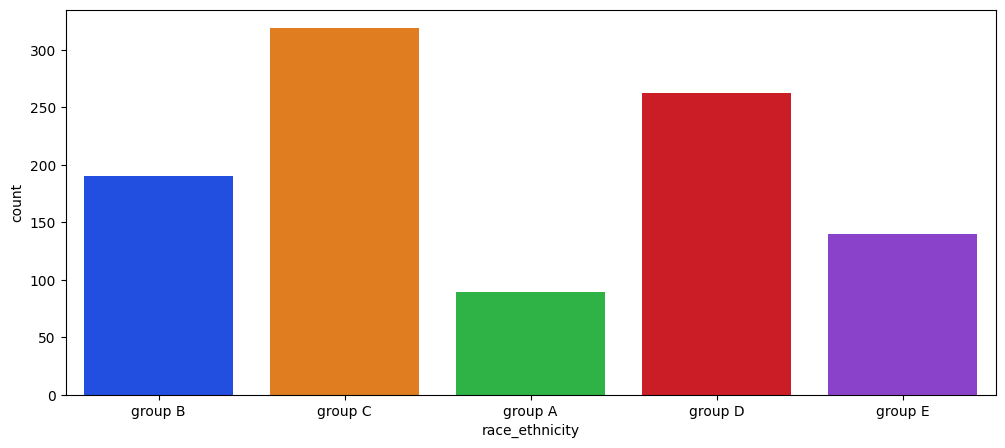

In [85]:
f,axes =plt.subplots(1,1,figsize = (12,5))
sns.countplot(x = df['race_ethnicity'],data = df, palette = 'bright')
plt.show()

In [88]:
race_group = df[numeric_features + ['total_score','average_score','race_ethnicity']].groupby('race_ethnicity').mean()

<Axes: xlabel='race_ethnicity', ylabel='average_score'>

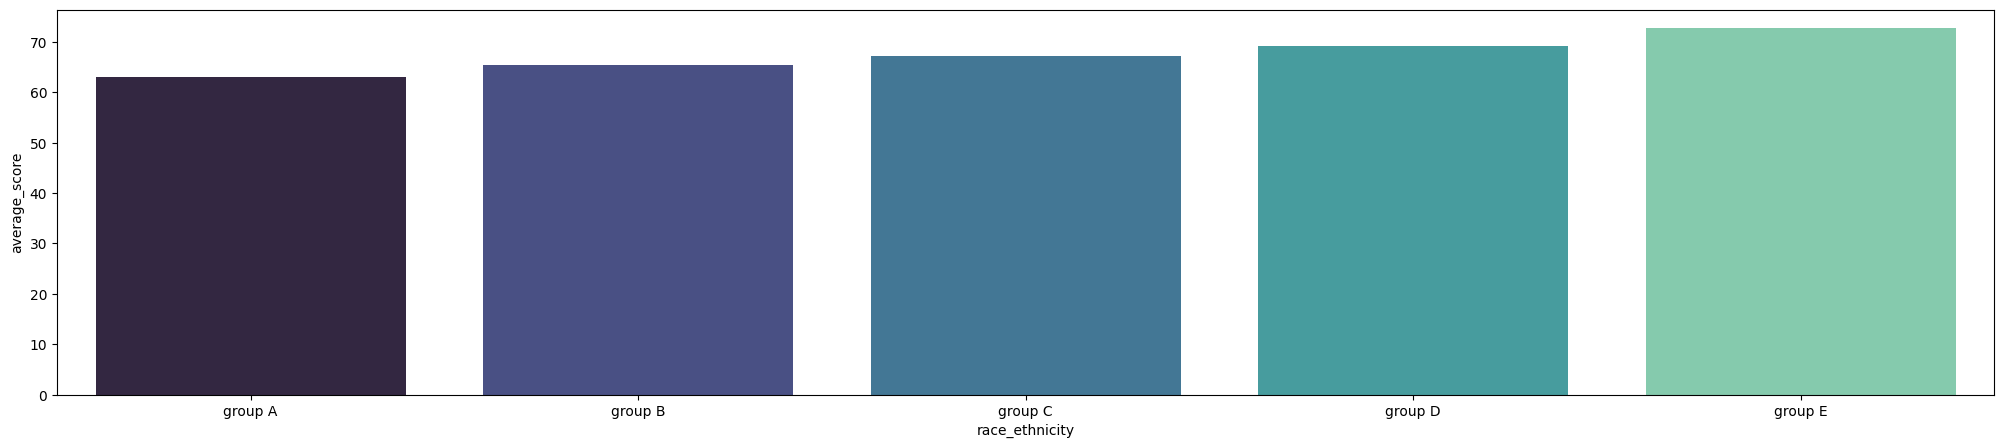

In [103]:
sns.barplot(x=race_group['average_score'].index,y=race_group['average_score'],palette = 'mako')



<Axes: xlabel='race_ethnicity', ylabel='total_score'>

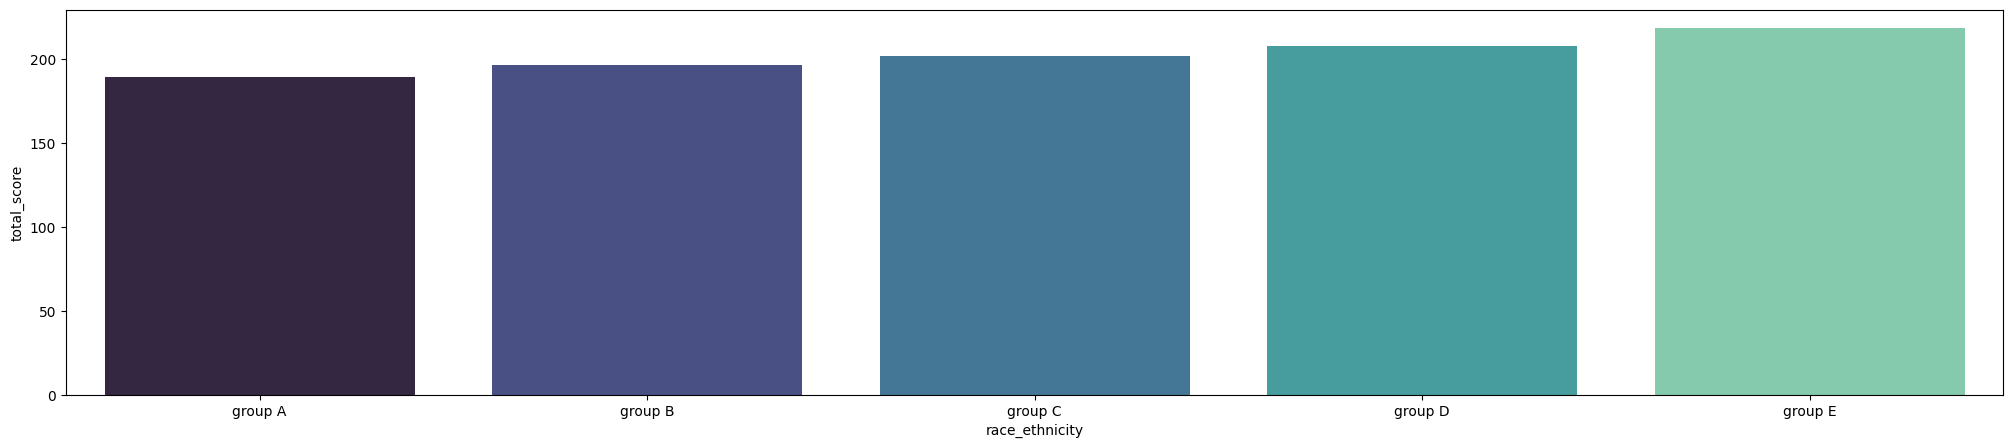

In [104]:
sns.barplot(x=race_group['total_score'].index,y=race_group['total_score'],palette = 'mako')


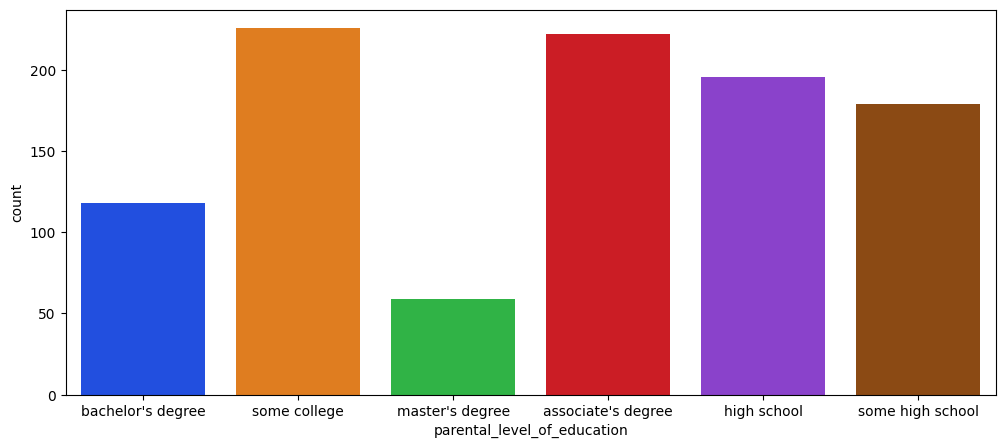

In [105]:
f,axes =plt.subplots(1,1,figsize = (12,5))
sns.countplot(x = df['parental_level_of_education'],data = df, palette = 'bright')
plt.show()

Observation:

Largest number of parents are from some college.

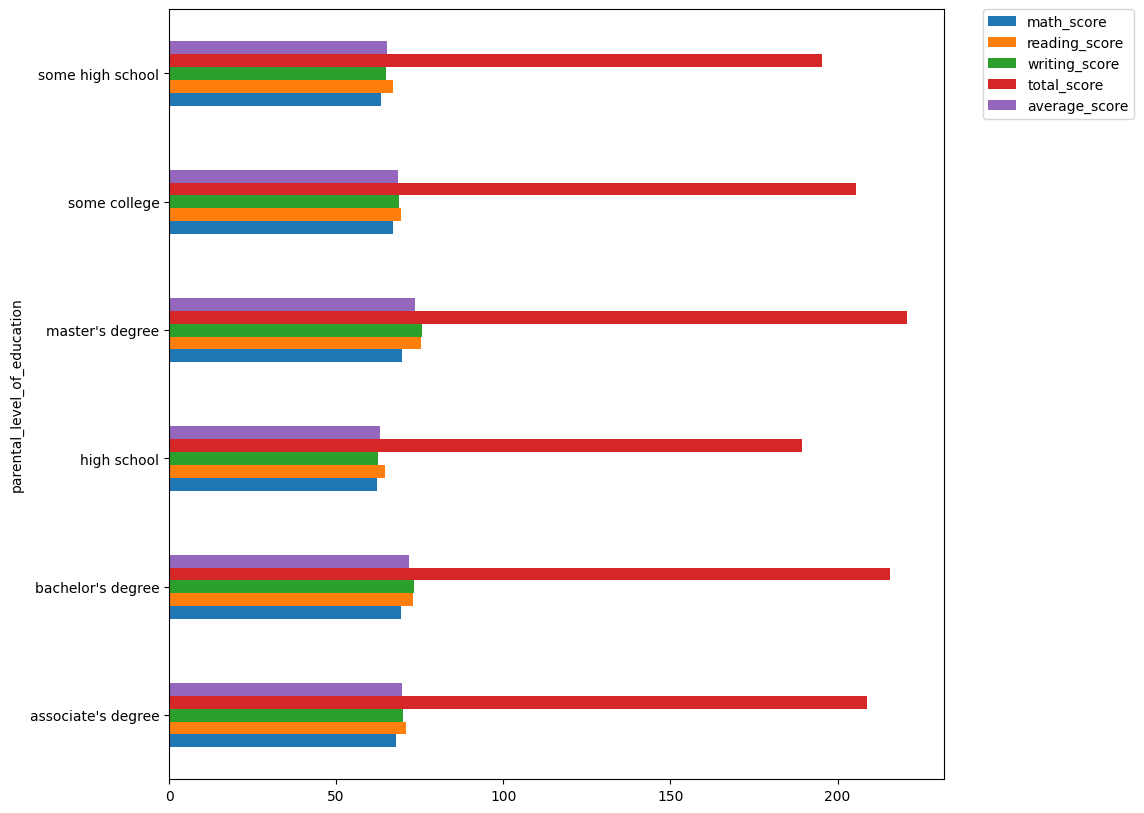

In [108]:
df[numeric_features + ['total_score','average_score','parental_level_of_education']].groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

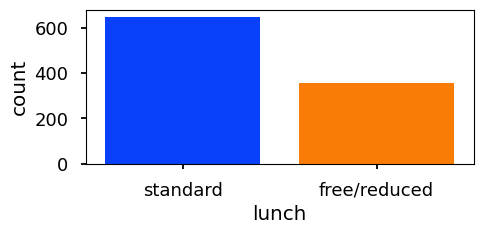

In [110]:
f,ax=plt.subplots(1,1,figsize=(5,2))
sns.countplot(x=df['lunch'],data=df,palette ='bright',saturation=0.95)
plt.show()

Observation:

Students being served Standard lunch was more than free lunch

<Axes: xlabel='lunch', ylabel='average_score'>

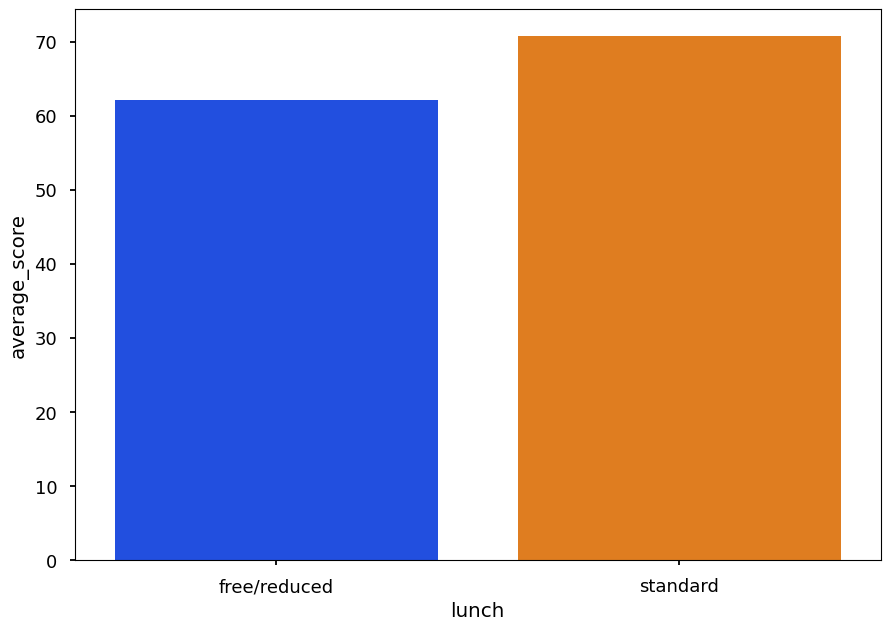

In [113]:
lunch_group = df[numeric_features + ['total_score','average_score','lunch']].groupby('lunch').mean()

sns.barplot(x = lunch_group['average_score'].index,y=lunch_group['average_score'],palette='bright')

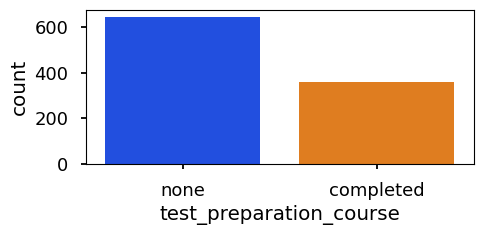

In [116]:
f,axes = plt.subplots(1,1,figsize=(5,2))
sns.countplot(x = df['test_preparation_course'], data = df, palette = 'bright')
plt.show()



Observation:

More than 50% students have completed preparations for test

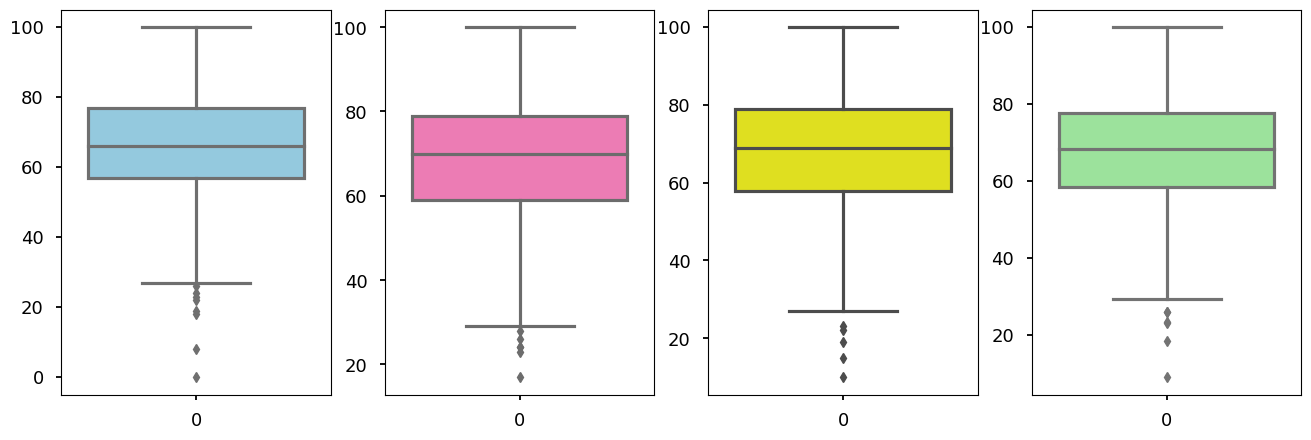

In [118]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

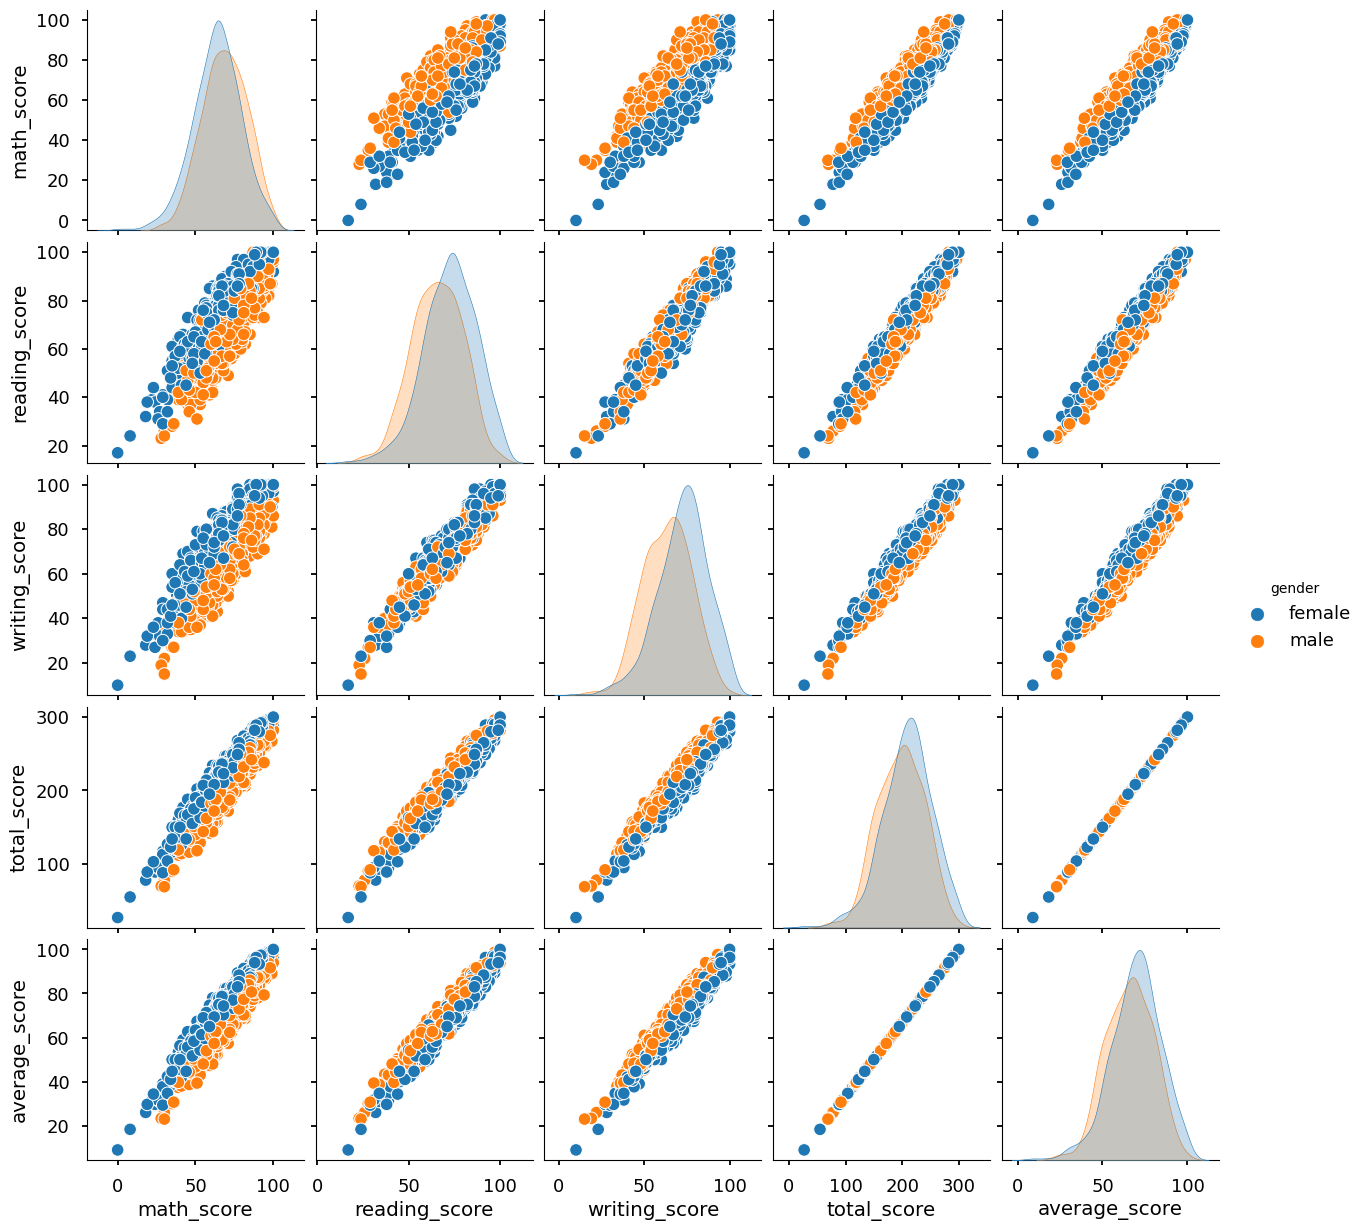

In [119]:
sns.pairplot(df,hue = 'gender')
plt.show()


Observations:

All scores linearly increases with each other.

5. Conclusion:

    1. Student's Performance is related with lunch, race, parental level education
    2. Females lead in pass percentage and also are top-scorers
    3. Student's Performance is not much related with test preparation course but finishing preparation course is benefitial.